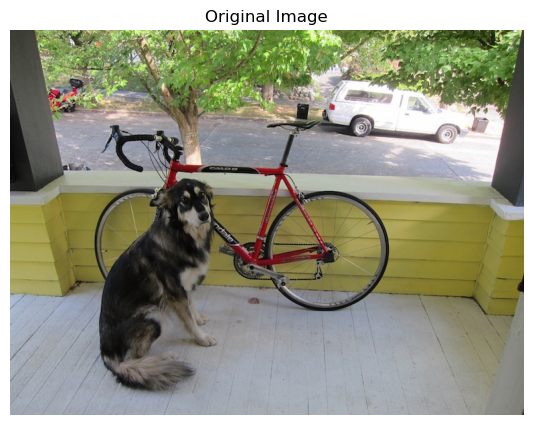

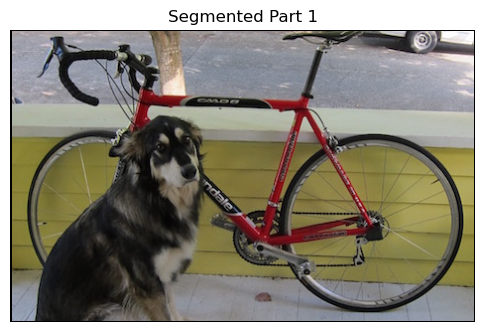

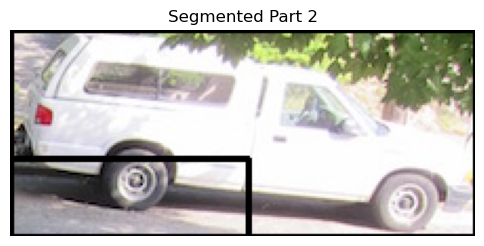

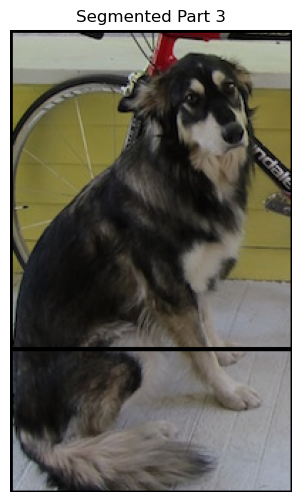

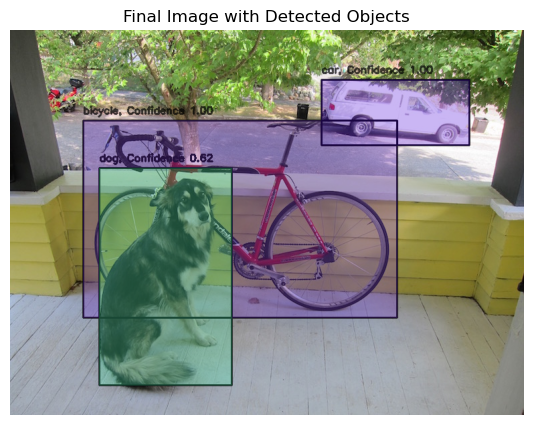

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Define the list of class names
class_names = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'
]

# Load the pre-trained MobileNet SSD model and config
net = cv2.dnn.readNetFromCaffe('deploy.prototxt', 'mobilenet_iter_73000.caffemodel')

def random_color():
    """Generate a random color."""
    return [random.randint(0, 255) for _ in range(3)]

def detect_objects(image_path, output_folder='segmented_images'):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    (h, w) = image.shape[:2]
    
    # Display the original image
    plt.figure(figsize=(10, 5))
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # Prepare the image for the model
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1/255.0, (300, 300), swapRB=True, crop=False)
    net.setInput(blob)
    detections = net.forward()
    
    # Create an output folder if it does not exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Create an overlay for colored rectangles
    overlay = image.copy()
    
    # Process the detections
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            
            # Generate a random color
            color = random_color()
            
            # Draw the filled rectangle on the overlay
            cv2.rectangle(overlay, (startX, startY), (endX, endY), color, thickness=cv2.FILLED)
            
            # Draw the border and label on the original image
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 0), 2)
            label_index = int(detections[0, 0, i, 1])
            label_name = class_names[label_index]
            label_text = f"{label_name}, Confidence {confidence:.2f}"
            cv2.putText(image, label_text, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
            
            # Extract the segmented part
            segmented_part = image[startY:endY, startX:endX]
            
            # Save the segmented part
            segmented_part_path = os.path.join(output_folder, f'segmented_part_{i + 1}.png')
            cv2.imwrite(segmented_part_path, segmented_part)
            
            # Display the segmented part
            plt.figure(figsize=(6, 6))
            plt.title(f'Segmented Part {i + 1}')
            plt.imshow(cv2.cvtColor(segmented_part, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
    
    # Blend the overlay with the original image
    alpha = 0.3  # Transparency factor
    final_image = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    
    # Display the final image with colors
    plt.figure(figsize=(10, 5))
    plt.title('Final Image with Detected Objects')
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Path to the input image
image_path = "obj.jpg"

# Perform object detection
detect_objects(image_path)
